In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import dateutil.parser
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# Load data

In [2]:
tweets_enphase_energy = pd.read_csv('../../../preprocessing_v2/twitter_data_cleaned_04_24_21/1_enphase_energy_tweets_cleaned.csv')

In [3]:
tweets_first_solar = pd.read_csv('../../../preprocessing_v2/twitter_data_cleaned_04_24_21/2_first_solar_tweets_cleaned.csv')

In [4]:
tweets_siemens = pd.read_csv('../../../preprocessing_v2/twitter_data_cleaned_05_03_21/3_siemens_gamesa_tweets_cleaned_05_03.csv')

In [5]:
tweets_plug_power = pd.read_csv('../../../preprocessing_v2/twitter_data_cleaned_04_24_21/4_plug_power_tweets_cleaned.csv')

In [6]:
tweets_tesla = pd.read_csv('../../../preprocessing_v2/twitter_data_cleaned_04_24_21/5_tesla_tweets_cleaned.csv')

In [7]:
tweets_sunrun = pd.read_csv('../../../preprocessing_v2/twitter_data_cleaned_04_24_21/6_sunrun_tweets_cleaned.csv')

In [8]:
tweets_sunpower = pd.read_csv('../../../preprocessing_v2/twitter_data_cleaned_04_24_21/7_sunpower_tweets_cleaned.csv')

In [9]:
tweets_meridian_energy = pd.read_csv('../../../preprocessing_v2/twitter_data_cleaned_04_24_21/8_meridian_energy_tweets_cleaned.csv')

# Generate weekly popularity time series

In [23]:
def delete_header_rows(df):
    index_names = df[df['CreatedAt'] == 'CreatedAt' ].index
    df.drop(index_names, inplace = True)
    df.info()
    return df

def select_columns(df, columns):
    df = df[columns]
    return df

def create_date_time_index(df):
    df.index = pd.to_datetime(df['CreatedAt'])
    df.rename(index={'CreatedAt':'CreatedAtDateTime'})
    df.drop('CreatedAt', axis=1, inplace=True)
    return df

def count_weekly_tweets(df):
    weekly_tweets = pd.DataFrame(df.resample('W')['TweetText'].count())
    weekly_tweets.rename(columns = {"TweetText":"Count"}, inplace=True)
    weekly_tweets.reset_index(inplace=True)
    return weekly_tweets



def plot_time_series(df, company):
    plt.figure(figsize=(15,6))
    df1 = df.set_index('CreatedAt')
    fig,ax = plt.subplots(figsize=(15,6))
    df1.plot(kind='line',ax=ax)
    plt.title(company + " Twitter Popularity")
    plt.show()

def add_company_name(df, company):
    df['Company'] = company
    return df

def generate_weekly_counts(tweets_all, company):
    # delete headers on csv
    tweets_all = delete_header_rows(tweets_all)
        
    # drop unwanted columns    
    columns_to_keep = ['CreatedAt','TweetText', 'Tweet_stemmed']
    tweets = select_columns(tweets_all, columns_to_keep)
    
    # created datetime as index
    tweets = create_date_time_index(tweets)
    
    # counts tweets by week and create new dataframe
    weekly_tweets = count_weekly_tweets(tweets)
    
    weekly_tweets = add_company_name(weekly_tweets, company)
    
    
    return weekly_tweets

## Enphase Energy

In [19]:
weekly_tweets_enphase_energy = generate_weekly_counts(tweets_enphase_energy, "Enphase Energy")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141475 entries, 0 to 141803
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CreatedAt         141475 non-null  object
 1   TweetId           141475 non-null  object
 2   AuthorId          141475 non-null  object
 3   TweetText         141475 non-null  object
 4   Tweet_punct       141475 non-null  object
 5   Tweet_tokenized   141475 non-null  object
 6   Tweet_nonstop     141475 non-null  object
 7   Tweet_stemmed     141475 non-null  object
 8   Tweet_lemmatized  141475 non-null  object
dtypes: object(9)
memory usage: 15.8+ MB


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
weekly_tweets_enphase_energy

,CreatedAt,Count,Company
0,2011-01-09 00:00:00+00:00,27,Enphase Energy
1,2011-01-16 00:00:00+00:00,21,Enphase Energy
2,2011-01-23 00:00:00+00:00,47,Enphase Energy
3,2011-01-30 00:00:00+00:00,21,Enphase Energy
4,2011-02-06 00:00:00+00:00,43,Enphase Energy
...,...,...,...
530,2021-03-07 00:00:00+00:00,999,Enphase Energy
531,2021-03-14 00:00:00+00:00,1203,Enphase Energy
532,2021-03-21 00:00:00+00:00,643,Enphase Energy
533,2021-03-28 00:00:00+00:00,746,Enphase Energy


<Figure size 1080x432 with 0 Axes>

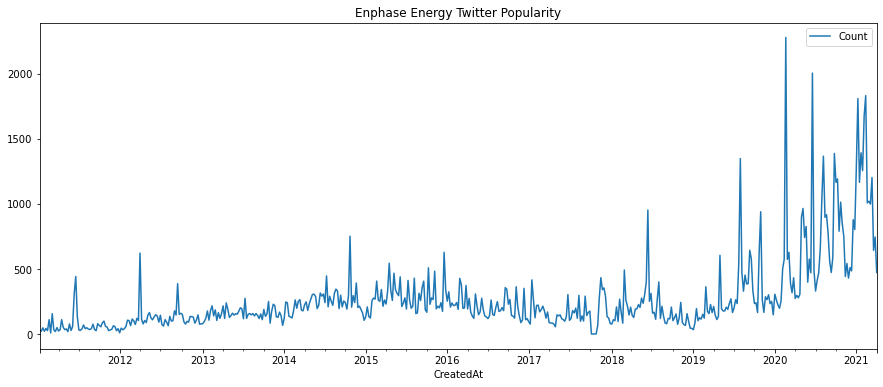

In [24]:
plot_time_series(weekly_tweets_enphase_energy, "Enphase Energy")

## First Solar

In [14]:
weekly_tweets_first_solar = generate_weekly_counts(tweets_first_solar, "First Solar")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156812 entries, 0 to 157163
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CreatedAt         156812 non-null  object
 1   TweetId           156812 non-null  object
 2   AuthorId          156812 non-null  object
 3   TweetText         156812 non-null  object
 4   Tweet_punct       156812 non-null  object
 5   Tweet_tokenized   156812 non-null  object
 6   Tweet_nonstop     156812 non-null  object
 7   Tweet_stemmed     156812 non-null  object
 8   Tweet_lemmatized  156812 non-null  object
dtypes: object(9)
memory usage: 12.0+ MB


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
weekly_tweets_first_solar

,CreatedAt,Count,Company
0,2011-01-02 00:00:00+00:00,5,First Solar
1,2011-01-09 00:00:00+00:00,80,First Solar
2,2011-01-16 00:00:00+00:00,75,First Solar
3,2011-01-23 00:00:00+00:00,93,First Solar
4,2011-01-30 00:00:00+00:00,142,First Solar
...,...,...,...
531,2021-03-07 00:00:00+00:00,232,First Solar
532,2021-03-14 00:00:00+00:00,375,First Solar
533,2021-03-21 00:00:00+00:00,169,First Solar
534,2021-03-28 00:00:00+00:00,250,First Solar


<Figure size 1080x432 with 0 Axes>

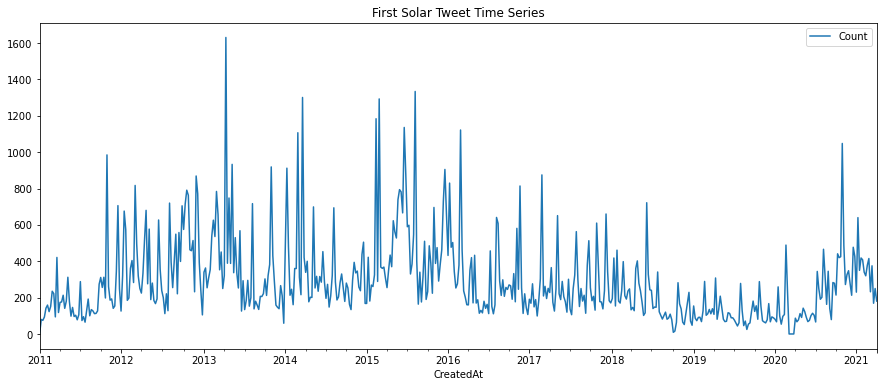

In [16]:
plot_time_series(weekly_tweets_first_solar)

## Siemens 

In [17]:
weekly_tweets_siemens = generate_weekly_counts(tweets_siemens, "Siemens Gamesa")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102360 entries, 0 to 102573
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CreatedAt         102360 non-null  object
 1   TweetId           102360 non-null  object
 2   AuthorId          102360 non-null  object
 3   TweetText         102360 non-null  object
 4   Tweet_punct       102360 non-null  object
 5   Tweet_tokenized   102360 non-null  object
 6   Tweet_nonstop     102360 non-null  object
 7   Tweet_stemmed     102360 non-null  object
 8   Tweet_lemmatized  102360 non-null  object
dtypes: object(9)
memory usage: 7.8+ MB


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
weekly_tweets_siemens

,CreatedAt,Count,Company
0,2011-01-02 00:00:00+00:00,4,Siemens Gamesa
1,2011-01-09 00:00:00+00:00,29,Siemens Gamesa
2,2011-01-16 00:00:00+00:00,102,Siemens Gamesa
3,2011-01-23 00:00:00+00:00,48,Siemens Gamesa
4,2011-01-30 00:00:00+00:00,80,Siemens Gamesa
...,...,...,...
531,2021-03-07 00:00:00+00:00,673,Siemens Gamesa
532,2021-03-14 00:00:00+00:00,472,Siemens Gamesa
533,2021-03-21 00:00:00+00:00,385,Siemens Gamesa
534,2021-03-28 00:00:00+00:00,593,Siemens Gamesa


<Figure size 1080x432 with 0 Axes>

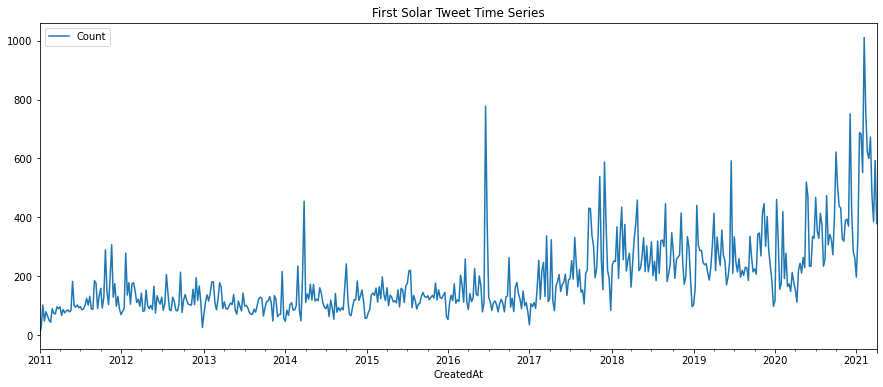

In [19]:
plot_time_series(weekly_tweets_siemens)

# Plug Power

In [20]:
weekly_tweets_plug_power = generate_weekly_counts(tweets_plug_power, "Plug Power")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209277 entries, 0 to 209723
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CreatedAt         209277 non-null  object
 1   TweetId           209277 non-null  object
 2   AuthorId          209277 non-null  object
 3   TweetText         209277 non-null  object
 4   Tweet_punct       209277 non-null  object
 5   Tweet_tokenized   209277 non-null  object
 6   Tweet_nonstop     209277 non-null  object
 7   Tweet_stemmed     209277 non-null  object
 8   Tweet_lemmatized  209277 non-null  object
dtypes: object(9)
memory usage: 16.0+ MB


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<Figure size 1080x432 with 0 Axes>

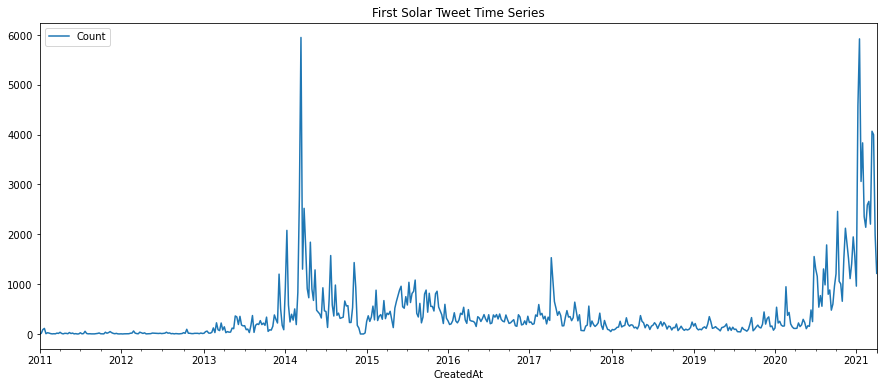

In [21]:
plot_time_series(weekly_tweets_plug_power)

# Tesla

In [22]:
# weekly_tweets_tesla = generate_weekly_counts(tweets_tesla, "Tesla - Solar City")

In [23]:
# plot_time_series(weekly_tweets_tesla)

# Sunrun

In [24]:
weekly_tweets_sunrun = generate_weekly_counts(tweets_sunrun, "Sunrun")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157006 entries, 0 to 157344
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CreatedAt         157006 non-null  object
 1   TweetId           157006 non-null  object
 2   AuthorId          157006 non-null  object
 3   TweetText         157006 non-null  object
 4   Tweet_punct       157006 non-null  object
 5   Tweet_tokenized   157006 non-null  object
 6   Tweet_nonstop     157006 non-null  object
 7   Tweet_stemmed     157006 non-null  object
 8   Tweet_lemmatized  157006 non-null  object
dtypes: object(9)
memory usage: 12.0+ MB


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<Figure size 1080x432 with 0 Axes>

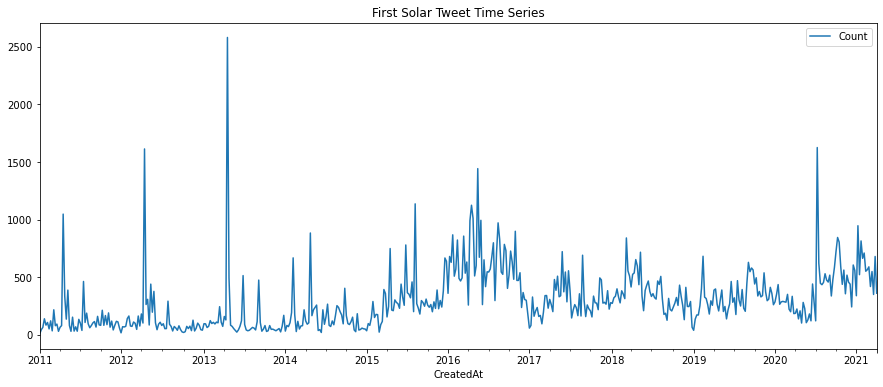

In [25]:
plot_time_series(weekly_tweets_sunrun)

# Sunpower

In [26]:
weekly_tweets_sunpower = generate_weekly_counts(tweets_sunpower, "Sunpower")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95064 entries, 0 to 95269
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CreatedAt         95064 non-null  object
 1   TweetId           95064 non-null  object
 2   AuthorId          95064 non-null  object
 3   TweetText         95064 non-null  object
 4   Tweet_punct       95064 non-null  object
 5   Tweet_tokenized   95064 non-null  object
 6   Tweet_nonstop     95064 non-null  object
 7   Tweet_stemmed     95064 non-null  object
 8   Tweet_lemmatized  95064 non-null  object
dtypes: object(9)
memory usage: 7.3+ MB


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<Figure size 1080x432 with 0 Axes>

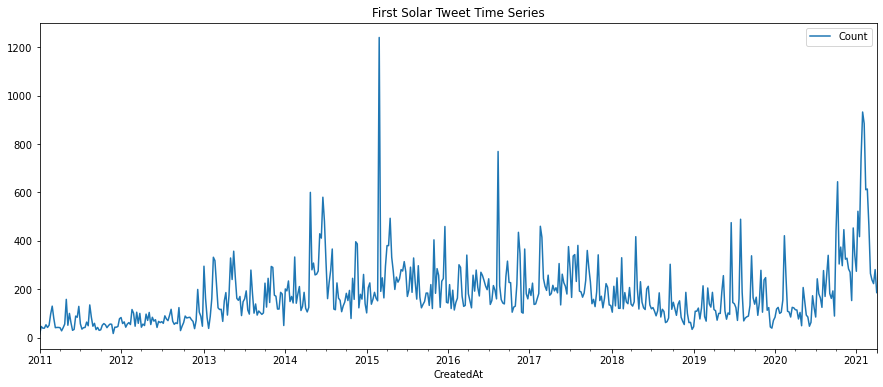

In [27]:
plot_time_series(weekly_tweets_sunpower)

# Meridian Energy

In [28]:
weekly_tweets_meridian_energy = generate_weekly_counts(tweets_meridian_energy, "Meridian Energy")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9790 entries, 0 to 9812
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CreatedAt         9790 non-null   object
 1   TweetId           9790 non-null   object
 2   AuthorId          9790 non-null   object
 3   TweetText         9790 non-null   object
 4   Tweet_punct       9790 non-null   object
 5   Tweet_tokenized   9790 non-null   object
 6   Tweet_nonstop     9790 non-null   object
 7   Tweet_stemmed     9790 non-null   object
 8   Tweet_lemmatized  9790 non-null   object
dtypes: object(9)
memory usage: 764.8+ KB


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<Figure size 1080x432 with 0 Axes>

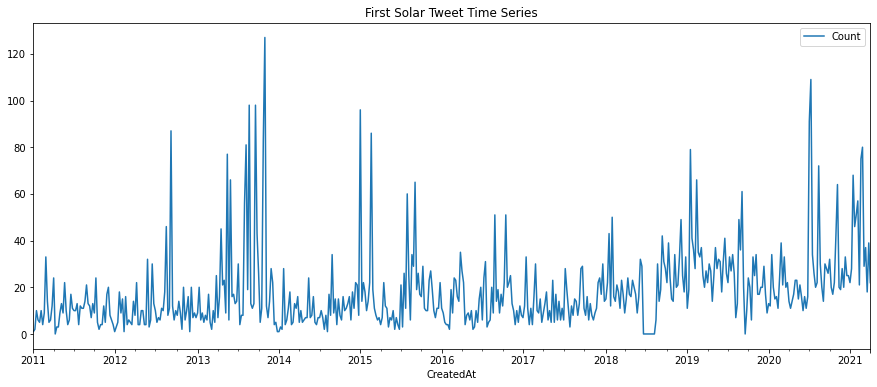

In [29]:
plot_time_series(weekly_tweets_meridian_energy)